# Machine learning project
## Breast Cancer Prediction
### Elene Zuroshvili
#### 26.04.2023

In [47]:
import pandas as pd
import numpy as np                    # to generate grids and vectors

# algorithms
from sklearn import dummy
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

# evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

# plotting
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure            # for setting the figure size

# data loading, preprocessing, and descretization

In [48]:
cols=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df=pd.read_csv('breast-cancer.data',names=cols)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# exploratory data analysis

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [50]:
df.isna()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [51]:
df.isna().any()

class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
dtype: bool

In [52]:
df.isna().sum() 

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [53]:
df = df.dropna(axis='columns')

In [54]:
df['class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64

In [55]:
diagnosis_unique = df['class'].unique()
diagnosis_unique

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('darkgrid')

Text(0.5, 0, 'recurrence')

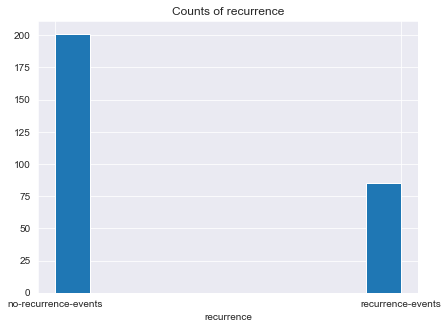

In [57]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist( df['class'])
# plt.legend()
plt.title("Counts of recurrence")
plt.xlabel("recurrence")


In [59]:
# Loop over each column in the dataframe and print out the unique values
for column in df.columns:
    print("Unique values in column '{}': {}".format(column, df[column].unique()))


Unique values in column 'class': ['no-recurrence-events' 'recurrence-events']
Unique values in column 'age': ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Unique values in column 'menopause': ['premeno' 'ge40' 'lt40']
Unique values in column 'tumor-size': ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Unique values in column 'inv-nodes': ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Unique values in column 'node-caps': ['no' 'yes' '?']
Unique values in column 'deg-malig': [3 2 1]
Unique values in column 'breast': ['left' 'right']
Unique values in column 'breast-quad': ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Unique values in column 'irradiat': ['no' 'yes']


In [60]:
df = df[df['node-caps'] != '?']

In [61]:
df = df[df['breast-quad'] != '?']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        277 non-null    object
 1   age          277 non-null    object
 2   menopause    277 non-null    object
 3   tumor-size   277 non-null    object
 4   inv-nodes    277 non-null    object
 5   node-caps    277 non-null    object
 6   deg-malig    277 non-null    int64 
 7   breast       277 non-null    object
 8   breast-quad  277 non-null    object
 9   irradiat     277 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.8+ KB


# Data Binarization

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["class"])
print("The labeles to encode:",list(le.classes_))
classes = le.transform(df["class"])
df["class"] = classes
#1=recurrence-events, 0=no-recurrence-events

The labeles to encode: ['no-recurrence-events', 'recurrence-events']


In [64]:
le = LabelEncoder()
le.fit(df["breast"])
print("The labeles to encode:",list(le.classes_))
breastB = le.transform(df["breast"])
df["breast"] = breastB
#1=right, 0=left

The labeles to encode: ['left', 'right']


In [65]:
# define a function to convert age range to single age
def convert_age(age_range):
    age_list = age_range.split('-')
    if len(age_list) == 2:
        return (float(age_list[0]) + float(age_list[1])) / 2
    else:
        return float(age_range)

# apply the function to the age column
df['age'] = df['age'].apply(convert_age)

In [66]:
# apply the function to the tumor size column
df['tumor-size'] = df['tumor-size'].apply(convert_age)

In [67]:
# apply the function to the inv nodes column
df['inv-nodes'] = df['inv-nodes'].apply(convert_age)

In [68]:
le = LabelEncoder()
le.fit(df["node-caps"])
print("The labeles to encode:",list(le.classes_))
nodes = le.transform(df["node-caps"])
df["node-caps"] = nodes
#1=yes, 0=no

The labeles to encode: ['no', 'yes']


In [69]:
le = LabelEncoder()
le.fit(df["menopause"])
print("The labeles to encode:",list(le.classes_))
meno = le.transform(df["menopause"])
df["menopause"] = meno

The labeles to encode: ['ge40', 'lt40', 'premeno']


In [70]:
le = LabelEncoder()
le.fit(df["breast-quad"])
print("The labeles to encode:",list(le.classes_))
breast = le.transform(df["breast-quad"])
df["breast-quad"] = breast

The labeles to encode: ['central', 'left_low', 'left_up', 'right_low', 'right_up']


In [71]:
le = LabelEncoder()
le.fit(df["irradiat"])
print("The labeles to encode:",list(le.classes_))
rad = le.transform(df["irradiat"])
df["irradiat"] = rad

The labeles to encode: ['no', 'yes']


In [72]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,2,32.0,1.0,0,3,0,1,0
1,0,44.5,2,22.0,1.0,0,2,1,4,0
2,0,44.5,2,22.0,1.0,0,2,0,1,0
3,0,64.5,0,17.0,1.0,0,2,1,2,0
4,0,44.5,2,2.0,1.0,0,2,1,3,0


In [73]:
# Loop over each column in the dataframe and print out the unique values
for column in df.columns:
    print("Unique values in column '{}': {}".format(column, df[column].unique()))


Unique values in column 'class': [0 1]
Unique values in column 'age': [34.5 44.5 64.5 54.5 74.5 24.5]
Unique values in column 'menopause': [2 0 1]
Unique values in column 'tumor-size': [32. 22. 17.  2. 27. 52. 12. 42. 37.  7. 47.]
Unique values in column 'inv-nodes': [ 1.  7. 10.  4. 16. 13. 25.]
Unique values in column 'node-caps': [0 1]
Unique values in column 'deg-malig': [3 2 1]
Unique values in column 'breast': [0 1]
Unique values in column 'breast-quad': [1 4 2 3 0]
Unique values in column 'irradiat': [0 1]


In [74]:
df['class'].value_counts()

0    196
1     81
Name: class, dtype: int64

# data preprocessing done, start experiment 

In [75]:
#importing all the algorithms and evaluation criteria
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

In [76]:
#defining prediction features and target variable
prediction_feature = [ 'age', 'tumor-size','menopause','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

targeted_feature = 'class'

len(prediction_feature)

9

In [77]:
X = df[prediction_feature]
X

# print(X.shape)
# print(X.values)

,age,tumor-size,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,34.5,32.0,2,1.0,0,3,0,1,0
1,44.5,22.0,2,1.0,0,2,1,4,0
2,44.5,22.0,2,1.0,0,2,0,1,0
3,64.5,17.0,0,1.0,0,2,1,2,0
4,44.5,2.0,2,1.0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...
281,34.5,32.0,2,1.0,0,2,0,2,0
282,34.5,22.0,2,1.0,0,3,0,2,1
283,64.5,22.0,0,1.0,0,1,1,2,0
284,44.5,32.0,0,4.0,0,3,0,1,0


In [78]:
y=df['class']
y

0      0
1      0
2      0
3      0
4      0
      ..
281    1
282    1
283    1
284    1
285    1
Name: class, Length: 277, dtype: int64

In [79]:
#splitting the data into train and test sets with size 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)

      age  tumor-size  menopause  inv-nodes  node-caps  deg-malig  breast  \
202  44.5        42.0          2        1.0          0          1       0   
89   44.5        42.0          2        1.0          0          1       1   
55   74.5        42.0          0        1.0          0          1       1   
258  54.5        32.0          0        7.0          1          2       0   
175  44.5        32.0          2        1.0          0          2       1   
..    ...         ...        ...        ...        ...        ...     ...   
204  54.5        27.0          2        1.0          0          2       0   
156  54.5        27.0          0        4.0          1          3       1   
157  54.5        32.0          2        1.0          0          1       0   
133  54.5        42.0          0        1.0          0          3       0   
252  34.5        42.0          2        1.0          0          1       0   

     breast-quad  irradiat  
202            1         0  
89             2 

# Baseline

In [80]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier with the most frequent strategy
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the dummy classifier on the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dummy_clf.predict(X_test)

# Calculate the accuracy of the baseline model
baseline_acc = accuracy_score(y_test, y_pred)

# Print the accuracy of the baseline model
print("Baseline accuracy: {:.2f}%".format(baseline_acc * 100))

Baseline accuracy: 68.48%


In [81]:

# Define the majority class baseline
majority_class = 1  # change to 1 to predict class 1 as the majority class

# Make predictions
y_pred = np.full_like(y, fill_value=majority_class)

# Compute the evaluation metrics for class 1 (recurrence)
class_id = 1  # class 1 is "recurrence"
acc = accuracy_score(y_true=y, y_pred=y_pred)
prec = precision_score(y_true=y, y_pred=y_pred, pos_label=class_id, zero_division=0)
rec = recall_score(y_true=y, y_pred=y_pred, pos_label=class_id, zero_division=0)
f1 = f1_score(y_true=y, y_pred=y_pred, pos_label=class_id, zero_division=0)

# Print the results
print(f"Baseline results for class {class_id} (recurrence):")
print(f"Precision = {prec:.2f}")
print(f"Recall = {rec:.2f}")
print(f"F1-score = {f1:.2f}")


Baseline results for class 1 (recurrence):
Accuracy = 0.29
Precision = 0.29
Recall = 1.00
F1-score = 0.45


In [82]:

# Define the majority class baseline
majority_class = 0  # change to 1 to predict class 1 as the majority class

# Make predictions
y_pred = np.full_like(y, fill_value=majority_class)

# Compute the evaluation metrics for class 1 (recurrence)
class_id = 0  # class 1 is "recurrence"
acc = accuracy_score(y_true=y, y_pred=y_pred)
prec = precision_score(y_true=y, y_pred=y_pred, pos_label=class_id, zero_division=0)
rec = recall_score(y_true=y, y_pred=y_pred, pos_label=class_id, zero_division=0)
f1 = f1_score(y_true=y, y_pred=y_pred, pos_label=class_id, zero_division=0)

# Print the results
print(f"Baseline results for class {class_id} (recurrence):")
print(f"Precision = {prec:.2f}")
print(f"Recall = {rec:.2f}")
print(f"F1-score = {f1:.2f}")


Baseline results for class 0 (recurrence):
Accuracy = 0.71
Precision = 0.71
Recall = 1.00
F1-score = 0.83


# Models

In [83]:
#builidng the function for models
def model_building(model, X_train, X_test, y_train, y_test): 
    """
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    

In [84]:
#defining the list of algorithms i am going to use with baseline parameters
models_list = {
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5, max_leaf_nodes=30)
}

In [85]:
print(list(models_list.keys()))
print(list(models_list.values()))

['RandomForestClassifier', 'DecisionTreeClassifier']
[RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=30,
                       random_state=0)]


In [86]:
# Let's Define the function for confision metric Graphs
from sklearn.metrics import confusion_matrix
def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [87]:
#doing the experiment and prinitng out evaluation criteria
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)





Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        63
           1       0.45      0.31      0.37        29

    accuracy                           0.66        92
   macro avg       0.59      0.57      0.57        92
weighted avg       0.64      0.66      0.64        92



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        63
           1       0.50      0.31      0.38        29

    accuracy                           0.68        92
   macro avg       0.61      0.58      0.59        92
weighted avg       0.66      0.68      0.66        92



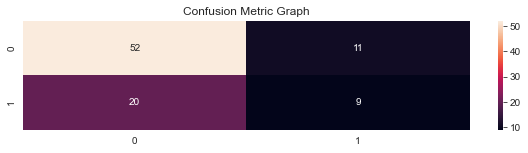

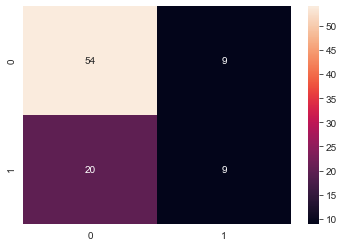

<Figure size 432x288 with 0 Axes>

In [89]:
#confusion matrices
import seaborn as sns
plt.figure(figsize=(10, 2))
plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):

    plt.xlabel("Negative Positive")
    plt.ylabel("True Positive")

    
    
    # Show The Metrics Graph    
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)

In [90]:
df_pred #accuracy scores from the matrices

,model_name,score,accuracy_score,accuracy_percentage
0,RandomForestClassifier,0.962162,0.663043,66.30%
1,DecisionTreeClassifier,0.864865,0.684783,68.48%


# parameter tuning with grid search

In [40]:
from  sklearn.model_selection import GridSearchCV

In [41]:
# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To 


 Best Score is 
0.783625730994152

 Best Estinator is 
DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=6)

 Best Parametes are
{'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6}


In [42]:
# Pick the model
model = RandomForestClassifier()
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq


 Best Score is 
0.7456140350877193

 Best Estinator is 
RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

 Best Parametes are
{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [43]:
#defining new algorithms list with tuned parameters
models_list1 = {
    "RandomForestClassifier" :  RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=200),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(max_features='auto', min_samples_leaf=7,min_samples_split=10)
}

In [44]:
#applying the experiment function to the data with new parameters 
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list1.keys()), list(models_list1.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred1 = pd.DataFrame(df_prediction, columns=df_prediction_cols)




Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        63
           1       0.67      0.41      0.51        29

    accuracy                           0.75        92
   macro avg       0.72      0.66      0.67        92
weighted avg       0.74      0.75      0.73        92



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        63
           1       0.59      0.45      0.51        29

    accuracy                           0.73        92
   macro avg       0.68      0.65      0.66        92
weighted avg       0.71      0.73      0.72        92



/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [45]:
df_pred #old accuracy scores

,model_name,score,accuracy_score,accuracy_percentage
0,RandomForestClassifier,0.962162,0.663043,66.30%
1,DecisionTreeClassifier,0.864865,0.684783,68.48%


In [46]:
df_pred1 #new accuracy scores

,model_name,score,accuracy_score,accuracy_percentage
0,RandomForestClassifier,0.908108,0.750000,75.00%
1,DecisionTreeClassifier,0.794595,0.728261,72.83%


# visualization for point 5 in the seminar paper

Accuracy =  0.5434782608695652


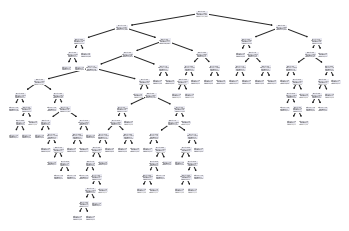

In [47]:
from sklearn import tree
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_testing = accuracy_score(y_pred, y_test)
print("Accuracy = ",acc_testing)
plt.figure(2)
stockTree = tree.plot_tree(dt)
plt.show()

/Users/elenezuroshvili/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy =  0.7282608695652174


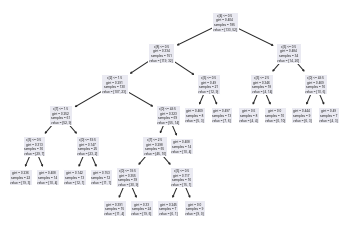

In [48]:
dt = DecisionTreeClassifier(max_features='auto', min_samples_leaf=7,min_samples_split=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_testing = accuracy_score(y_pred, y_test)
print("Accuracy = ",acc_testing)
plt.figure(2)
stockTree = tree.plot_tree(dt)
plt.show()

# Thank you for your attention <3